<a href="https://colab.research.google.com/github/Behnam9473/AI/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import tensorflow as tf
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


[ 0.85800304  0.73354022  0.83890413  0.79275336  0.64830042 -0.16851884
 -0.16773542 -0.35732891 -0.81642294 -0.91983783 -0.96661783 -0.73340213
 -1.09493361 -0.5872242  -0.59640866 -0.34928973  0.17393418  0.36215111
  0.49385843  0.92646769  1.06201796  1.08161421  0.90781345  1.0905728
  0.45714798  0.53321883 -0.1296063  -0.26751106 -0.60268614 -0.72147408
 -0.75410742 -1.15009052 -0.91118225 -0.77511179 -0.74016673 -0.46135964
 -0.16668334  0.40133089  0.14026184  0.80227929  0.74781561  0.92664115
  0.99087996  0.53217815  0.84328161  0.56421033  0.17947975  0.1915951
 -0.04810532 -0.64314955 -0.77930622 -1.29383785 -0.99917024 -0.78273585
 -0.46727054 -0.57406518 -0.43927244 -0.21108452  0.17308248  0.40112967
  0.6653409   0.80587315  0.92833148  0.94765185  0.85108784  0.88014306
  0.39771791  0.08352864 -0.24743671  0.11512713 -0.69505399 -0.70289707
 -0.8747797  -0.76649151 -0.88052251 -0.61743209 -1.05795413 -0.32585576
 -0.51373597  0.13202788  0.48023873  0.86380335  0.7

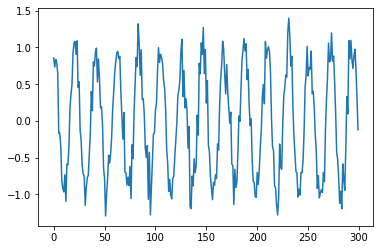

In [35]:
s = np.cos(0.3 * np.arange(300)) + np.random.randn(300) * 0.2

print(s)
print("==============================================================================")
plt.plot(s)


In [36]:
T = 10 
D = 1
X = []
Y = []
for t in range(len(s) - T):
  x = s[t:t+T]
  print("t = ",t, "x = ", x)
  print("=========================================================================")
  X.append(x)
  print("X = ",X, np.shape(X))
  y = s[t+T]
  print("=========================================================================")
  print("y = ",y)
  Y.append(y)
  print("=========================================================================")
  print("Y =",np.shape(Y))

print("Xshape = ", np.shape(X))


Streaming output truncated to the last 5000 lines.
       -0.96661783, -0.73340213, -1.09493361, -0.5872242 , -0.59640866]), array([-0.16773542, -0.35732891, -0.81642294, -0.91983783, -0.96661783,
       -0.73340213, -1.09493361, -0.5872242 , -0.59640866, -0.34928973]), array([-0.35732891, -0.81642294, -0.91983783, -0.96661783, -0.73340213,
       -1.09493361, -0.5872242 , -0.59640866, -0.34928973,  0.17393418]), array([-0.81642294, -0.91983783, -0.96661783, -0.73340213, -1.09493361,
       -0.5872242 , -0.59640866, -0.34928973,  0.17393418,  0.36215111]), array([-0.91983783, -0.96661783, -0.73340213, -1.09493361, -0.5872242 ,
       -0.59640866, -0.34928973,  0.17393418,  0.36215111,  0.49385843]), array([-0.96661783, -0.73340213, -1.09493361, -0.5872242 , -0.59640866,
       -0.34928973,  0.17393418,  0.36215111,  0.49385843,  0.92646769]), array([-0.73340213, -1.09493361, -0.5872242 , -0.59640866, -0.34928973,
        0.17393418,  0.36215111,  0.49385843,  0.92646769,  1.06201796]),

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
        0.66490601,  0.02989634, -0.35304099, -0.40489443, -0.88611557]), array([ 0.85427381,  0.9659192 ,  1.01007114,  0.94424425,  0.66490601,
        0.02989634, -0.35304099, -0.40489443, -0.88611557, -0.90940838]), array([ 0.9659192 ,  1.01007114,  0.94424425,  0.66490601,  0.02989634,
       -0.35304099, -0.40489443, -0.88611557, -0.90940838, -1.14755756]), array([ 1.01007114,  0.94424425,  0.66490601,  0.02989634, -0.35304099,
       -0.40489443, -0.88611557, -0.90940838, -1.14755756, -1.28105965]), array([ 0.94424425,  0.66490601,  0.02989634, -0.35304099, -0.40489443,
       -0.88611557, -0.90940838, -1.14755756, -1.28105965, -1.056192  ]), array([ 0.66490601,  0.02989634, -0.35304099, -0.40489443, -0.88611557,
       -0.90940838, -1.14755756, -1.28105965, -1.056192  , -0.31504379]), array([ 0.02989634, -0.35304099, -0.40489443, -0.88611557, -0.90940838,
       -1.14755756, -1.28105965, -1.056192  , -0.31504379, -0.63092701]),

In [37]:
X = np.array(X).reshape(-1, T, 1) # Data shape is N * T * D
Y = np.array(Y)
N = len(X)
print("X.shape = ", X.shape, "Y.shape = ", Y.shape)

X.shape =  (290, 10, 1) Y.shape =  (290,)


In [38]:
i = Input(shape = (T, 1))
x = SimpleRNN(10, activation = 'relu')(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(loss = 'mse',
              optimizer = Adam(lr = 0.1))
r = model.fit(
    X[:-N//2], Y[:-N//2],
    validation_data = (X[-N//2:], Y[-N//2:]),
     epochs = 100)

Epoch 1/100


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


5/5 [==============================] - 2s 78ms/step - loss: 2.6862 - val_loss: 0.1798
Epoch 2/100
5/5 [==============================] - 0s 12ms/step - loss: 0.2301 - val_loss: 0.2859
Epoch 3/100
5/5 [==============================] - 0s 16ms/step - loss: 0.2859 - val_loss: 0.3014
Epoch 4/100
5/5 [==============================] - 0s 17ms/step - loss: 0.2702 - val_loss: 0.2619
Epoch 5/100
5/5 [==============================] - 0s 86ms/step - loss: 0.2152 - val_loss: 0.2149
Epoch 6/100
5/5 [==============================] - 0s 13ms/step - loss: 0.1652 - val_loss: 0.1739
Epoch 7/100
5/5 [==============================] - 0s 15ms/step - loss: 0.1449 - val_loss: 0.1700
Epoch 8/100
5/5 [==============================] - 0s 11ms/step - loss: 0.1311 - val_loss: 0.1437
Epoch 9/100
5/5 [==============================] - 0s 13ms/step - loss: 0.1192 - val_loss: 0.1342
Epoch 10/100
5/5 [==============================] - 0s 12ms/step - loss: 0.1152 - val_loss: 0.1270
Epoch 11/100
5/5 [=============

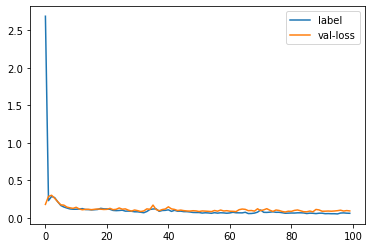

In [39]:
plt.plot(r.history['loss'], label = 'label')
plt.plot(r.history['val_loss'], label = 'val-loss')
plt.legend()

1/1 [==============================] - 0s 20ms/step


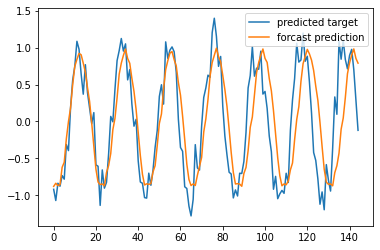

In [40]:
from prompt_toolkit.shortcuts.dialogs import Label
valid_target = Y[-N // 2:]
predict_list = []
train_input = X[-N // 2]
while len(predict_list)< len(valid_target):
  p = model.predict(train_input.reshape(1 , -1, 1))[0, 0]
  predict_list.append(p)
  train_input = np.roll(train_input, -1)
  train_input[-1] = p


plt.plot(valid_target, label = "predicted target")
plt.plot(predict_list, Label = "forcast prediction")
plt.legend()